<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BML%5D_%EC%84%A0%ED%98%95_%EB%B6%84%EB%A5%98_%EA%B5%90%EC%B0%A8_%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 데이터 생성

In [1]:
import numpy as np

seed = 1234
np.random.seed(seed)

# 데이터 생성
num_sample_per_class = 250

X_class1 = np.random.normal(2, 2, (num_sample_per_class, 2))
X_class2 = np.random.normal(-2, 2, (num_sample_per_class, 2))


X_ = np.vstack([X_class1, X_class2]) # feature 두 개를 묶어주고 (250, 2) + (250, 2) -> (500, 2)
X = np.hstack([np.ones((num_sample_per_class * 2, 1)), X_]) # 1개의 bias를 추가 (500, 2) -> (500, 3)
y = np.array([1] * num_sample_per_class + [0] * num_sample_per_class)  # 클래스 레이블 생성

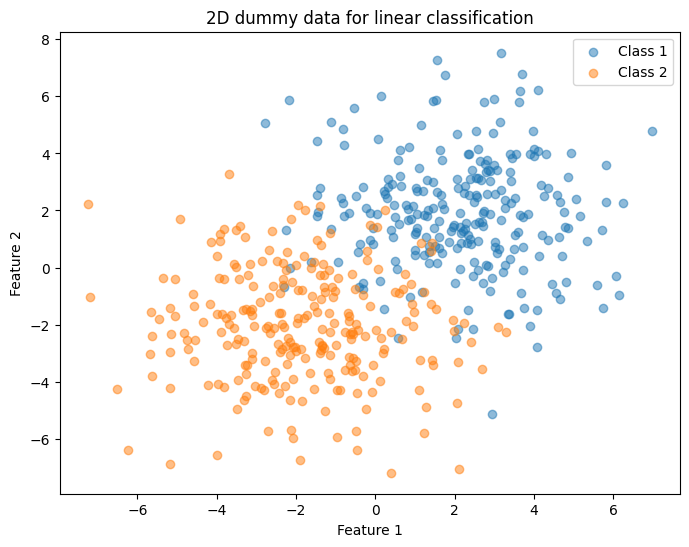

In [2]:
import matplotlib.pyplot as plt

# 클래스별 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], alpha=0.5, label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], alpha=0.5, label='Class 2')

# 그래프 설정
plt.title('2D dummy data for linear classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 그래프 출력
plt.show()


# Logistic Regression 모델 생성 및 학습과 결과 보기

In [3]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)

LogisticRegression()

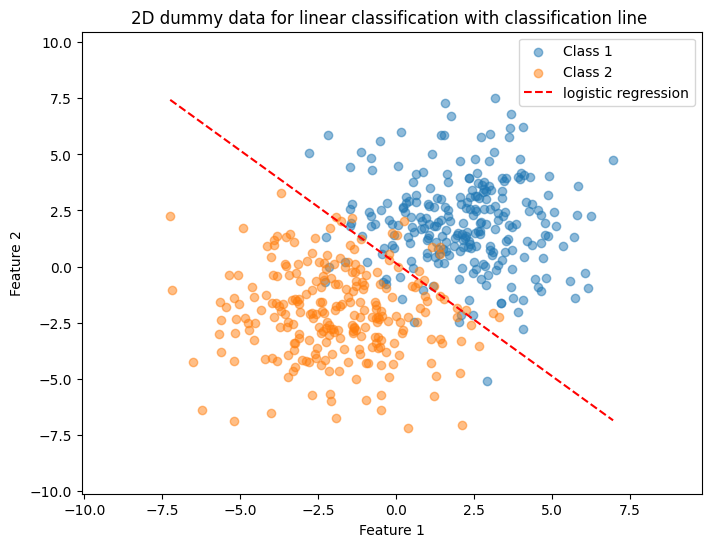

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], alpha=0.5, label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], alpha=0.5, label='Class 2')

w0 = logistic_reg.intercept_[0]
w1, w2 = logistic_reg.coef_[0][1:]

feauter1_value = np.array([X[:, 1].min(), X[:, 1].max()])
feature2_value = -(w0 + w1 * feauter1_value) / w2

plt.plot(feauter1_value, feature2_value, color='red', linestyle='--', label='logistic regression')

plt.title('2D dummy data for linear classification with classification line ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.margins(0.2)
plt.legend()

plt.show()

# Random Split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 학습, 평가 나누어서 정확도 구해
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
accuracy_random_split = accuracy_score(y_test, y_pred)
print(f'Random Split 결과 정확도 : {accuracy_random_split*100:.2f} %')

Random Split 결과 정확도 : 92.00 %


# K-Fold CV

In [7]:
from sklearn.model_selection import cross_val_score

# cv뒤에 숫자 몇 덩어리??  K-Fold
k_fold_score = np.mean(cross_val_score(logistic_reg, X, y, cv=5))
print(f'K-Fold CV 결과 정확도 : {k_fold_score*100:.2f} %')

K-Fold CV 결과 정확도 : 93.20 %


랜덤한 데이터가 생각보다 어려웠던 데이터가 모였을 가능성이있음! 92 < 93.2를 보아

# Stratified CV

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

stratified_cv_score = np.mean(cross_val_score(logistic_reg, X, y, cv=StratifiedKFold(5)))
print(f'Stratified CV 결과 정확도 : {stratified_cv_score*100:.2f} %')

Stratified CV 결과 정확도 : 93.20 %


# LOOCV

In [9]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

loocv_score = np.mean(cross_val_score(logistic_reg, X, y, cv=LeaveOneOut()))
print(f'LOOCV 결과 정확도 : {loocv_score*100:.2f} %')

LOOCV 결과 정확도 : 93.20 %
